## Import libs
Iport numpy and mathplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Define space properties

In [2]:
Nx = 100
Ny = 200

dx = 1
dy = 1

dt= 1e-9

imp0 = 120 * np.pi
mu0 = 4*np.pi * 1e-7
eps0 = mu0 / (imp0 * imp0)

eps = 1
mu = 1

eps_a = eps0 * eps
mu_a = mu0 * mu

## Define field source
### Define field source properties

In [3]:
tau = 100*dt

i_source = 0.75
j_source = 0.3

### Define source function

$$ Gauss(x) = e^{-x^2} $$

Source function:

$$ f(t) = Gauss\left(\frac{t-\tau}{3\cdot\tau}\right) = exp\left\{-\left(\frac{t-\tau}{\tau/3}\right)^2\right\} $$

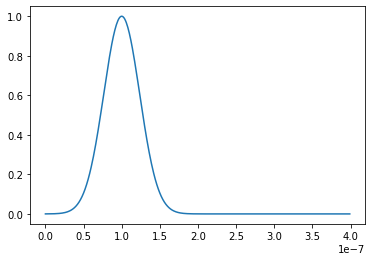

In [4]:
def Gauss(t):
    return np.exp(-t*t)

def Source(t, tau):
    return Gauss((t-tau)/(tau/3))

t = np.arange(0, 400*dt, dt)
s = Source(t, 100*dt)

plt.plot(t, s)
plt.show()

# FDTD 2D implementation

In [5]:
c_HE = dt / mu_a # константа для поля H для расчёта с полем E
c_EH = dt / eps_a # константа для поля Е для расчёта с полем H

def UpdateH(Hx, Hy, Hz, Ex, Ey, Ez):
    for i in range(0, Nx-1):
        for j in range(0, Ny-1):
            Hx[i,j] = Hx[i,j] - c_HE * (+(Ez[i, j+1] - Ez[i,j])) / dy
            Hy[i,j] = Hy[i,j] - c_HE * (-(Ez[i+1, j] - Ez[i,j])) / dx
            Hz[i,j] = Hz[i,j] - c_HE * ((Ey[i+1, j] - Ey[i,j]) / dx - (Ex[i, j+1] - Ex[i,j]) / dy)

def UpdateE(Hx, Hy, Hz, Ex, Ey, Ez):
    for i in range(1, Nx):
        for j in range(1, Ny):
            Ex[i,j] = Ex[i,j] + c_EH * (+(Hz[i,j] - Hz[i, j-1])) / dy
            Ey[i,j] = Ey[i,j] + c_EH * (-(Hz[i,j] - Hz[i-1, j])) / dx
            Ez[i,j] = Ez[i,j] + c_EH * ((Hy[i,j] - Hy[i-1, j]) / dx - (Hx[i,j] - Hx[i, j-1]) / dy)

def SetSourceEz(Ez, t: float):
    i = int(i_source * len(Ez))
    j = int(j_source * len(Ez[0]))
    Ez[i][j] += c_EH * Source(t, tau)

def GetField(Nt: int):
    Ex = np.zeros((Nx, Ny), dtype = float)
    Ey = np.zeros((Nx, Ny), dtype = float)
    Ez = np.zeros((Nx, Ny), dtype = float)

    Hx = np.zeros((Nx, Ny), dtype = float)
    Hy = np.zeros((Nx, Ny), dtype = float)
    Hz = np.zeros((Nx, Ny), dtype = float)

    Ez_result = []

    for n in range(0, Nt, 1):
        UpdateH(Hx, Hy, Hz, Ex, Ey, Ez)
        UpdateE(Hx, Hy, Hz, Ex, Ey, Ez)
        SetSourceEz(Ez, n*dt)
        Ez_result.append(np.copy(Ez))
    return Ez_result

## Computing Ez field in 500 iterations

In [6]:
n_time = 200
Ez = GetField(n_time)

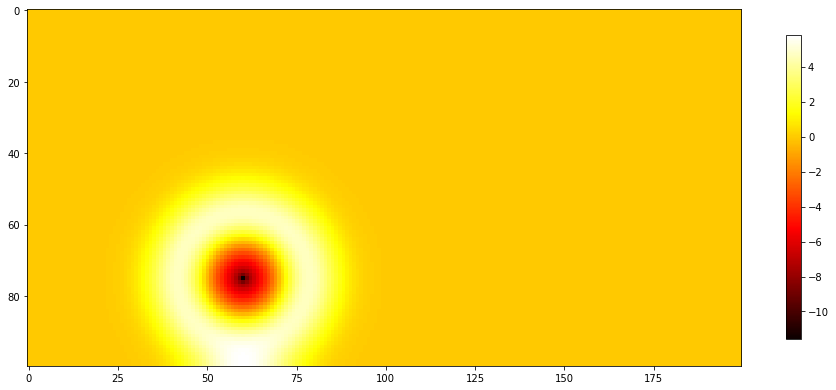

In [7]:
fig, ax = plt.subplots(figsize = (16,8))
im = ax.imshow(Ez[150], cmap = 'hot')
fig.colorbar(im, shrink=0.7, aspect=20)
plt.show()

## Field animation

In [8]:
import matplotlib.animation as animation

MovieWriter ffmpeg unavailable; using Pillow instead.


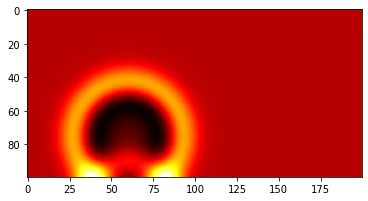

In [9]:
fig, ax = plt.subplots()

ims = []

for i in range(len(Ez)):
    im = ax.imshow(Ez[i], cmap = 'hot')
    if i == 0:
        ax.imshow(Ez[0])  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

ani.save("Ez.gif")

plt.show()